In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

# Question 2

In [2]:
fig1 = cv2.imread('fig1.jpg', 0)

hist , bins = np.histogram(fig1.flatten(), bins=256, range=(0,255))

pcs = np.cumsum(hist)/np.sum(hist)
var_w = np.zeros_like(hist, dtype='float32')

for thres in range(256):
    if thres == 255:
        var_w[thres] = np.var(hist)
    else:
        w1 = pcs[thres]
        w2 = 1 - w1

        var1 = np.var(hist[:thres + 1])
        var2 = np.var(hist[thres + 1:])

        var_w[thres] = w1 * var1 + w2 * var2
        
otsu_threshold = np.argwhere(var_w == var_w.min()).ravel()[0]

print("The calculated threshold by using Otsu Algorithms is equal {}.".format(otsu_threshold))

The calculated threshold by using Otsu Algorithms is equal 172.


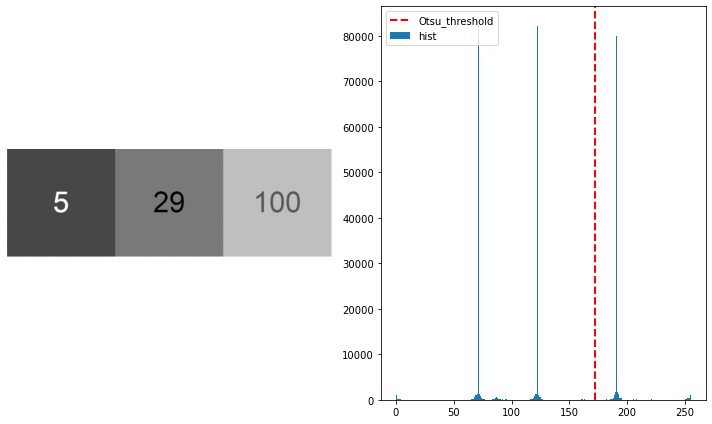

In [3]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.imshow(fig1, 'gray')
plt.axis('off')

plt.subplot(122)
plt.hist(fig1.flatten(), bins=256, range=(0,255), label='hist')
plt.axvline(otsu_threshold , color='r', lw=2, ls='--', label='Otsu_threshold')

plt.legend()
plt.tight_layout()
plt.show()

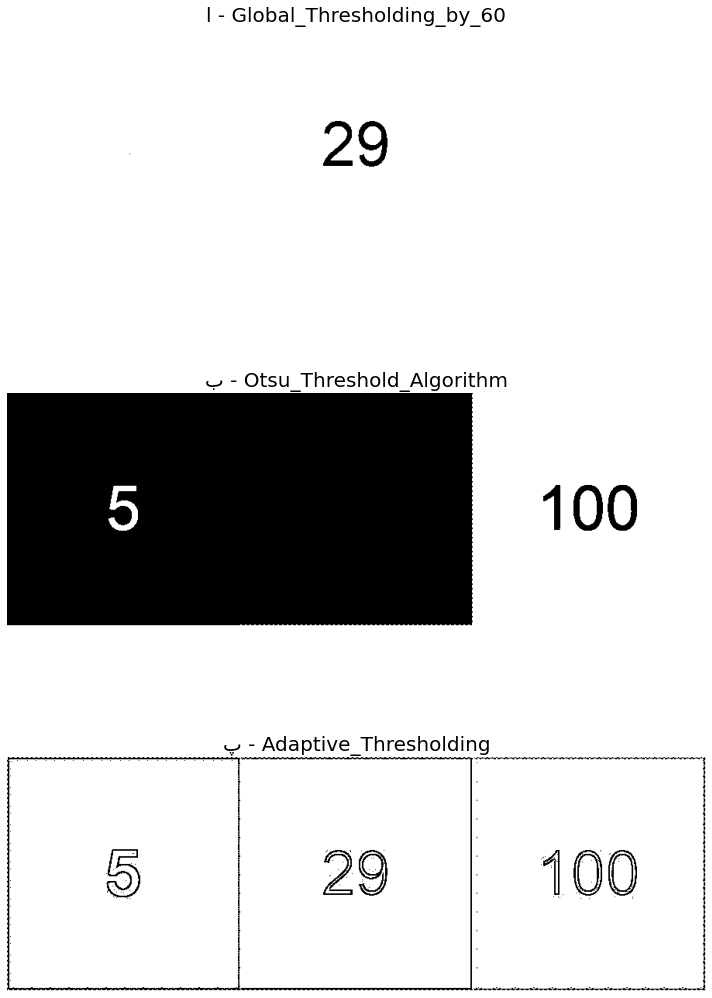

In [4]:
fig1_60 = cv2.threshold(fig1, 60, 255, cv2.THRESH_BINARY, cv2.THRESH_OTSU)
fig1_otsu = cv2.threshold(fig1, otsu_threshold, 255, cv2.THRESH_BINARY, cv2.THRESH_OTSU)
fig1_adt = cv2.adaptiveThreshold(fig1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=5, C=5)

plt.figure(figsize=(10,16))

plt.subplot(311)
plt.imshow(fig1_60[1], 'gray')
plt.axis('off')
plt.title('ا - Global_Thresholding_by_60', size=20)

plt.subplot(312)
plt.imshow(fig1_otsu[1], 'gray')
plt.axis('off')
plt.title('ب - Otsu_Threshold_Algorithm', size=20)

plt.subplot(313)
plt.imshow(fig1_adt, 'gray')
plt.axis('off')
plt.title('پ - Adaptive_Thresholding', size=20)

plt.tight_layout()
plt.show()

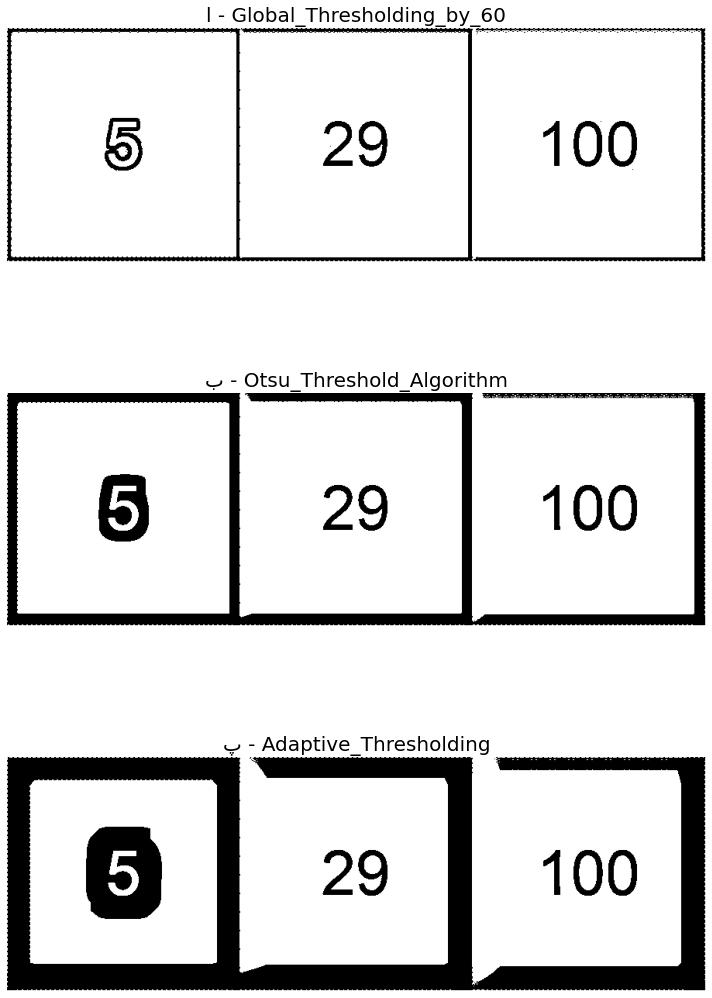

In [5]:
thr = lambda b, c: cv2.adaptiveThreshold(fig1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=b, C=c)

plt.figure(figsize=(10,16))

plt.subplot(311)
plt.imshow(thr(11, 5), 'gray')
plt.axis('off')
plt.title('ا - Global_Thresholding_by_60', size=20)

plt.subplot(312)
plt.imshow(thr(31, 5), 'gray')
plt.axis('off')
plt.title('ب - Otsu_Threshold_Algorithm', size=20)

plt.subplot(313)
plt.imshow(thr(71, 5), 'gray')
plt.axis('off')
plt.title('پ - Adaptive_Thresholding', size=20)

plt.tight_layout()
plt.show()

# Question 3

In [6]:
balls = cv2.imread('Balls.jpg', 0)

In [7]:
class Point():
    def __init__(self,x,y):
        self.x = x
        self.y = y
 
    def getX(self):
        return self.x
    def getY(self):
        return self.y
    def __str__(self):
        return "Point({}, {})".format(self.getX(), self.getY())
    
def difference_calculation(img,seed_point,target_Point):
    return np.abs(np.int(img[seed_point.x, seed_point.y]) - np.int(img[target_Point.x, target_Point.y]))


def Connectection():
    connects = [Point(-1, -1), Point(0, -1), Point(1, -1), Point(1, 0), Point(1, 1), Point(0, 1), Point(-1, 1), Point(-1, 0)]
    return connects


def region_Growthing(img, seeds, thresh):
    height, weight = img.shape
    seedMark = np.zeros(img.shape)
    
    seedList = [seeds]

    label = 1
    connects = Connectection()

    while(len(seedList)>0):
        currentPoint = seedList.pop(0)

        seedMark[currentPoint.x,currentPoint.y] = label
        for i in range(8):
            tmpX = currentPoint.x + connects[i].x
            tmpY = currentPoint.y + connects[i].y
            if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight:
                continue
            diff = difference_calculation(img,currentPoint,Point(tmpX,tmpY))
            if diff < thresh and seedMark[tmpX,tmpY] == 0:
                seedMark[tmpX,tmpY] = label
                seedList.append(Point(tmpX,tmpY))
    return seedMark

In [8]:
import numpy as np
import cv2

def onmouse(event, y, x, s, p):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        seed = Point(x, y)
        
        print(str(seed))
        cv2.destroyWindow('Balls')
        global binaryImg
        binaryImg = region_Growthing(img,seed,10)
        cv2.imshow('Balls',binaryImg)
        cv2.waitKey(0)
        
img = cv2.imread('Balls.jpg',0)

cv2.imshow('Balls',img)

cv2.setMouseCallback("Balls", onmouse)

cv2.waitKey(0)

cv2.destroyWindow('Balls')

Point(308, 278)


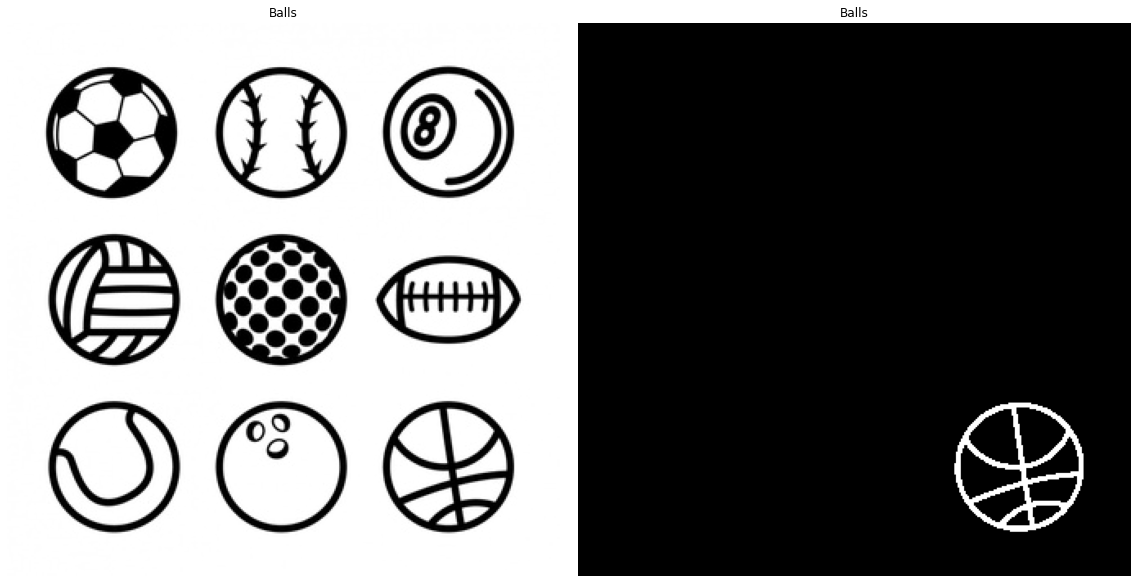

In [9]:
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.imshow(img, 'gray'), plt.axis('off'), plt.title('Balls')

plt.subplot(122)
plt.imshow(binaryImg, 'gray'), plt.axis('off'), plt.title('Balls')

plt.tight_layout()
plt.show()

# Question 4

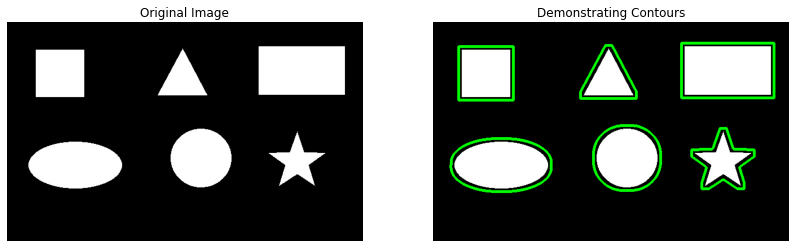

In [10]:
shapes = cv2.imread("shapes.jpg")
img = shapes.copy()
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(img, 'gray'), plt.axis('off'), plt.title("Original Image")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (13,13), 5)
cns, _ = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

plt.subplot(122)
cv2.drawContours(img, cns, -1, (0, 255, 0), 3)
plt.imshow(img.copy(), 'gray'), plt.axis('off'), plt.title("Demonstrating Contours")

plt.show()

In [11]:
compactness = np.zeros(len(cns))
solidity = np.zeros(len(cns))

hull = []

for i in range(0, len(cns)):
    convex_img = cv2.convexHull(cns[i])
    hull.append(convex_img)
    
    perimeter = cv2.arcLength(cns[i], True)
    area = cv2.contourArea(cns[i])
    convex_area = cv2.contourArea(convex_img)
    
    compactness[i] = (4 * np.pi * area) / perimeter**2
    solidity[i] = area / convex_area
    
    print("For contour :", i)
    print("Compactness is equal :", compactness[i])
    print("Solidity is equal :", solidity[i])
    print()

For contour : 0
Compactness is equal : 0.7813204408571979
Solidity is equal : 0.9920772737139136

For contour : 1
Compactness is equal : 0.4104472691979215
Solidity is equal : 0.6815496098104794

For contour : 2
Compactness is equal : 0.9047319446400153
Solidity is equal : 0.9934700674905776

For contour : 3
Compactness is equal : 0.7853129422425658
Solidity is equal : 1.0

For contour : 4
Compactness is equal : 0.6414194717758883
Solidity is equal : 0.9873341375150784

For contour : 5
Compactness is equal : 0.7336424294021877
Solidity is equal : 1.0



## Among all of the above shapes, star, it has the lowest **solidity**.

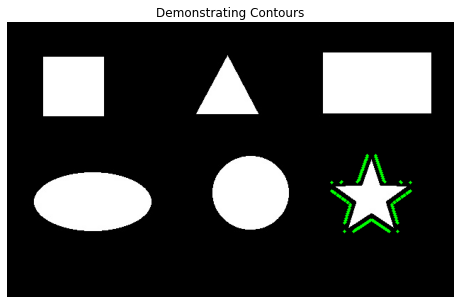

In [12]:
star = cns[solidity.argmin()].copy()

plt.figure(figsize=(8,6))
img2 = shapes.copy()
cv2.drawContours(img2, star, -1, (0, 255, 0), 3)
plt.imshow(img2, 'gray'), plt.axis('off'), plt.title("Demonstrating Contours")

plt.show()